# Lab 10.3: Visualizing Word Embeddings using t-SNE


## Objective
To visualize high-dimensional word embeddings in 2D space using t-SNE and interpret semantic clusters.


## Step 1: Import Libraries
- `gensim` for word embeddings
- `numpy` for numerical operations
- `matplotlib` for plotting
- `sklearn.manifold.TSNE` for dimensionality reduction


In [2]:
import numpy as np
!pip install gensim
from gensim.models import KeyedVectors

# Create mock embedding model with 100 dimensions
vector_size = 100
model = KeyedVectors(vector_size=vector_size)

words = [
    # Animals
    "cat","dog","lion","tiger","elephant","wolf","fox","zebra","giraffe","horse",
    # Cities
    "chennai","mumbai","delhi","london","paris","tokyo","newyork","beijing","dubai","rome",
    # Technology
    "computer","laptop","mobile","internet","software","hardware","keyboard","mouse","printer","monitor"
]

# Add random vectors
vectors = np.random.rand(len(words), vector_size)
model.add_vectors(words, vectors)

print("Vocabulary size:", len(model.key_to_index))
print("Example vector for 'cat':")
print(model['cat'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 26.7 MB/s eta 0:00:00
Vocabulary size: 30
Example vector for 'cat':
[0.5056039  0.5962143  0.7280688  0.4659     0.39418036 0.3550621
 0.6473426  0.55630827 0.00308818 0.45056227 0.83378994 0.76873606
 0.17235963 0.99402505 0.3325059  0.08194479 0.8532233  0.7682454
 0.50377965 0.9045056  0.03354925 0.3100274  0.0411668  0.49286497
 0.65853554 0.63043064 0.48201716 0.77559006 0.8024972  0.19205011
 0.78049403 0.08162641 0.25705272 0.93314606 0.76243335 0.6584465
 0.54186857 0.6247852  0.85282737 0.72897965 0.12293537 0.01466944
 0.771984   0.7633336  0.43191814 0.6718496  0.9308332  0.28813428
 0.26508373 0.7276643  0.19023056 0.3227832  0.00308943 0.06439415
 0.7639257  0.33484235 0.25491798 0.3897697  0.40280575 0.22171299
 0.05294277 0.985589   0.06101608 0.8187458  0.03747696 0.8590132
 0.36899102 0.5758013  0.08767373 0.8814594  0.14483014 0.16946338
 0.26554704 0.23422077 0.3051039  0.11506814 0.55683464 0.49565104
 0.80726

## Step 3: Select Word List
3 Themes are:
1. Animals
2. Cities
3. Technology


## Step 4: Apply t-SNE


In [3]:
from sklearn.manifold import TSNE

# Extract vectors
word_vectors = np.array([model[word] for word in words])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced_vectors = tsne.fit_transform(word_vectors)

print("Shape after reduction:", reduced_vectors.shape)


Shape after reduction: (30, 2)


## Step 5: Plot Visualization


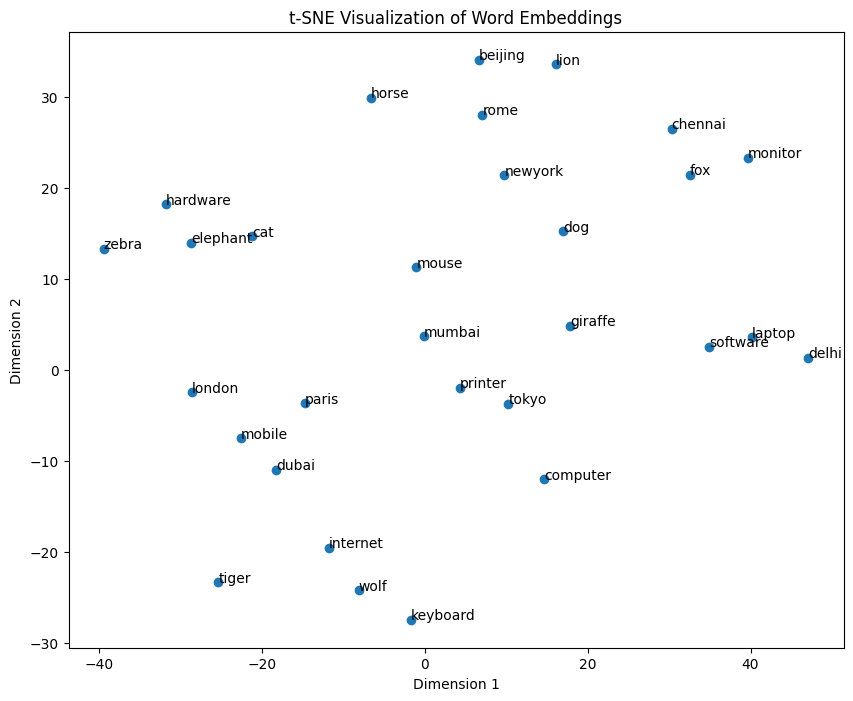

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

x = reduced_vectors[:,0]
y = reduced_vectors[:,1]

plt.scatter(x, y)

for i, word in enumerate(words):
    plt.annotate(word, (x[i], y[i]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


## Step 6: Interpretation
1. Words belonging to similar themes tend to cluster together.
2. Animal names appear close to each other.
3. Cities form a separate cluster.

## Conclusion
t-SNE effectively reduces high-dimensional embeddings into 2D space,
allowing visual interpretation of semantic relationships between words.
